# EDA

In [65]:
import pandas as pd
import seaborn as sns # other visualization tools, high level ploting language
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (13, 8) #default figure size, low level ploting language, easy to customizable
import numpy as np
from data_cleaning import get_merged_data_frame, get_clean_data

## 1. Import those CSV file to Pandas DataFrame

In [4]:
df_books, df_users, df_ratings = get_clean_data()
df_merged = get_merged_data_frame()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Din\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:

## Display those CSV structure

### Ratings

In [5]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
user      1149780 non-null int64
isbn      1149780 non-null object
rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [5]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### books

In [6]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271359 non-null object
Year-Of-Publication    271360 non-null object
Publisher              271358 non-null object
Image-URL-S            271360 non-null object
Image-URL-M            271360 non-null object
Image-URL-L            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### users

In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
User-ID     278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN



## Data integrity and referential integrity checks
The scout team has taken care of this part so ignore it if you feel like.

#### ratings dataframe
Check if there are duplicate records where both the user and isbn are the same (even if the rating is different).

In [9]:
len(df_ratings) != len(df_ratings.drop_duplicates(subset=['user', 'isbn']))

False

Check for missing values. Purple means all good.

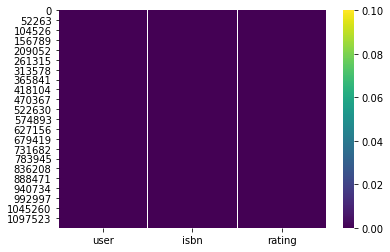

In [35]:
sns.heatmap(df_ratings.isnull(), cmap='viridis', vmin=0, vmax=0.5)
plt.show()

Unique values of ratigns

In [13]:
print(sorted(df_ratings['rating'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Distribution of the ratings

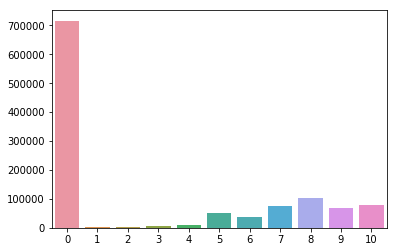

In [27]:
sns.barplot(
    x=df_ratings['rating'].value_counts().index, 
    y=df_ratings['rating'].value_counts().values
)
plt.show()

To see the string length of the ISBN

In [16]:
# Valid ISBN Ref: https://isbnsearch.org/search?s=342310538
sorted(df_ratings['isbn'].astype(str).map(len).unique())

[8, 9, 10, 11, 12, 13, 14]

Only ISBNs with 10 or 13 digits/characters are valid. (there can sometimes be an X at the end)

Find all the ISBN Length.

Valid ISBN is: 1141103
Invalid ISBN is: 8677
The % of the Valid ISBN is: 0.9924533388996156
The % of the Invalid ISBN is: 0.007546661100384422


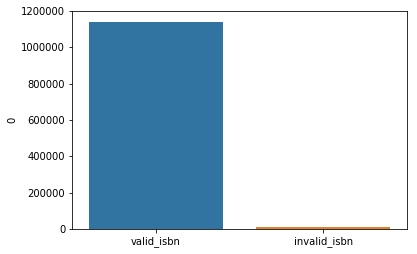

In [47]:
df_ratings_isbn_length = df_ratings['isbn'].astype(str).map(len).values
y = np.bincount(df_ratings_isbn_length)
ii = np.nonzero(y)[0]
result = np.vstack((ii,y[ii])).T
df_ratings_isbn_length_result = pd.DataFrame(result)
df_ratings_isbn_length_result = df_ratings_isbn_length_result.set_index([0])
del df_ratings_isbn_length_result.index.name
df_ratings_isbn_length_result.rename(columns={1:'count'}, inplace=True)
valid_isbn = df_ratings_isbn_length_result.loc[
    (df_ratings_isbn_length_result.index == 10) | 
    (df_ratings_isbn_length_result.index == 13), 'count'
].sum()
invalid_isbn = df_ratings_isbn_length_result.loc[
    ~((df_ratings_isbn_length_result.index == 10) | 
      (df_ratings_isbn_length_result.index == 13))
    , 'count'
].sum()
total_isbn = valid_isbn + invalid_isbn

print("Valid ISBN is: {}".format(valid_isbn))
print("Invalid ISBN is: {}".format(invalid_isbn))
print("The % of the Valid ISBN is: {}".format(valid_isbn/total_isbn))
print("The % of the Invalid ISBN is: {}".format(invalid_isbn/total_isbn))

isbn_ratio = np.array([valid_isbn, invalid_isbn], np.int32)
df_isbn_ratio = pd.DataFrame(isbn_ratio)

ax = sns.barplot(x=df_isbn_ratio.index, y=df_isbn_ratio[0])
ax.set_xticklabels(labels=['valid_isbn', 'invalid_isbn'])
plt.show()

#### books dataframe
Check for duplicates in ISBNs

In [30]:
len(df_books) != len(df_books.isbn.unique())

False

Check for missing values, purple means all good.

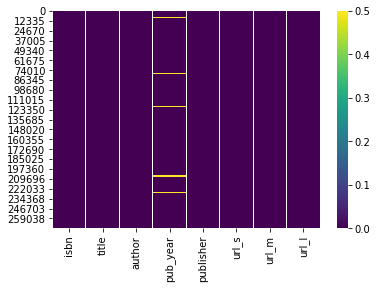

In [40]:
sns.heatmap(df_books.isnull(), cmap='viridis', vmin=0, vmax=0.5)
plt.show()

Find the valid ISBNs

Valid ISBN is: 271356
Invalid ISBN is: 1
The % of the Valid ISBN is: 0.9999963148177493
The % of the Invalid ISBN is: 3.6851822506882076e-06


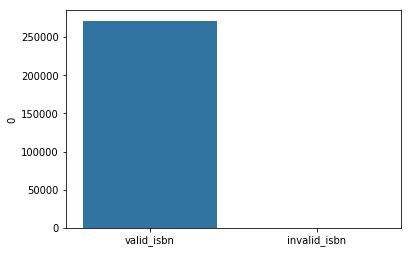

In [48]:
df_books_isbn_length = df_books['isbn'].astype(str).map(len).values
y2 = np.bincount(df_books_isbn_length)
ii2 = np.nonzero(y2)[0]
result2 = np.vstack((ii2,y2[ii2])).T
df_books_isbn_length_result = pd.DataFrame(result2)
df_books_isbn_length_result = df_books_isbn_length_result.set_index([0])
del df_books_isbn_length_result.index.name
df_books_isbn_length_result.rename(columns={1:'count'}, inplace=True)
valid_isbn2 = df_books_isbn_length_result.loc[
    (df_books_isbn_length_result.index == 10) | 
    (df_books_isbn_length_result.index == 13)
    , 'count'
].sum()
invalid_isbn2 = df_books_isbn_length_result.loc[
    ~((df_books_isbn_length_result.index == 10) | 
      (df_books_isbn_length_result.index == 13))
    , 'count'
].sum()
total_isbn2 = valid_isbn2 + invalid_isbn2

print("Valid ISBN is: {}".format(valid_isbn2))
print("Invalid ISBN is: {}".format(invalid_isbn2))
print("The % of the Valid ISBN is: {}".format(valid_isbn2/total_isbn2))
print("The % of the Invalid ISBN is: {}".format(invalid_isbn2/total_isbn2))

isbn_ratio2 = np.array([valid_isbn2, invalid_isbn2], np.int32)
df_isbn_ratio2 = pd.DataFrame(isbn_ratio2)
ax2 = sns.barplot(x=df_isbn_ratio2.index, y=df_isbn_ratio2[0])
ax2.set_xticklabels(labels=['valid_isbn', 'invalid_isbn'])
plt.show()

### users dataframe

Check for duplicates

In [50]:
len(df_users) != len(df_users.user.unique())

False

Check for missing values.

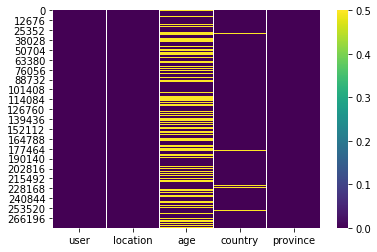

In [4]:
sns.heatmap(df_users.isnull(), cmap='viridis', vmin=0, vmax=0.5)
plt.show()

There are a lot of missing values in age. A couple in country as well. And as we shall see, some values in country are quite crappy. We have cleaned up the more popular ones in the data cleaning script.

#### Merged dataframe

In [39]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 14 columns):
user         1031136 non-null object
isbn         1031136 non-null object
rating       1031136 non-null int64
location     1031136 non-null object
age          751610 non-null float64
country      1031136 non-null object
province     1031136 non-null object
title        1031136 non-null object
author       1031135 non-null object
pub_year     1017057 non-null float64
publisher    1031134 non-null object
url_s        1031136 non-null object
url_m        1031136 non-null object
url_l        1031132 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 118.0+ MB


In [40]:
df_merged.head()

,user,isbn,rating,location,age,country,province,title,author,pub_year,publisher,url_s,url_m,url_l
0,276725,034545104X,0,"tyler, texas, usa",NaN,usa,texas,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,usa,ohio,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,usa,missouri,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,usa,missouri,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,usa,oregon,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


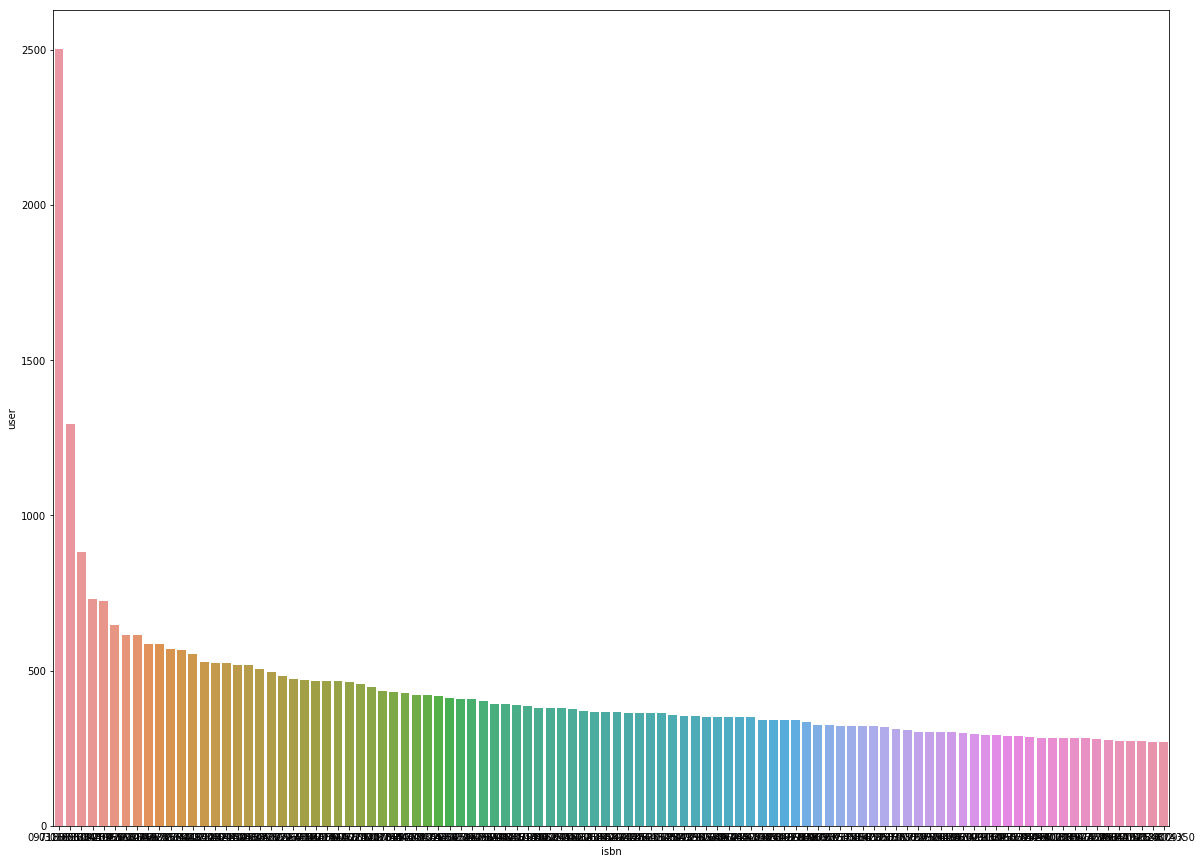

In [15]:
top_100_isbn = (
    df_merged.groupby('isbn')['user'].count().
    sort_values(ascending=False).head(100)
)
plt.subplots(figsize=(20,15))
sns.barplot(x=top_100_isbn.index,y=top_100_isbn)
plt.show()

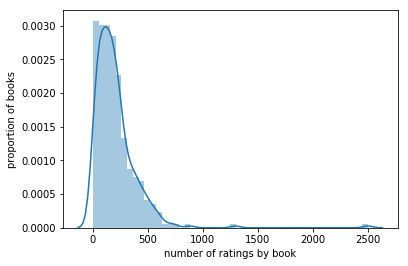

In [32]:
sns.distplot(df_merged.groupby('isbn')['user'].count().unique())
plt.xlabel('number of ratings by book')
plt.ylabel('proportion of books')
plt.show()

Most active users

In [30]:
df_merged.groupby(by='user')['isbn'].count().sort_values(ascending=False).head(10)

user
11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
212898     4289
278418     3996
76352      3329
110973     2971
235105     2943
Name: isbn, dtype: int64

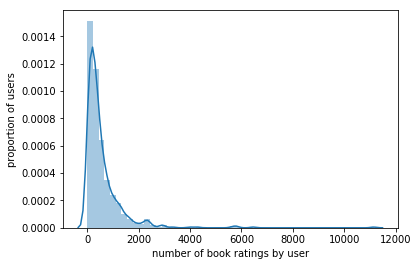

In [33]:
sns.distplot(df_merged.groupby('user')['isbn'].count().unique())
plt.xlabel('number of book ratings by user')
plt.ylabel('proportion of users')
plt.show()

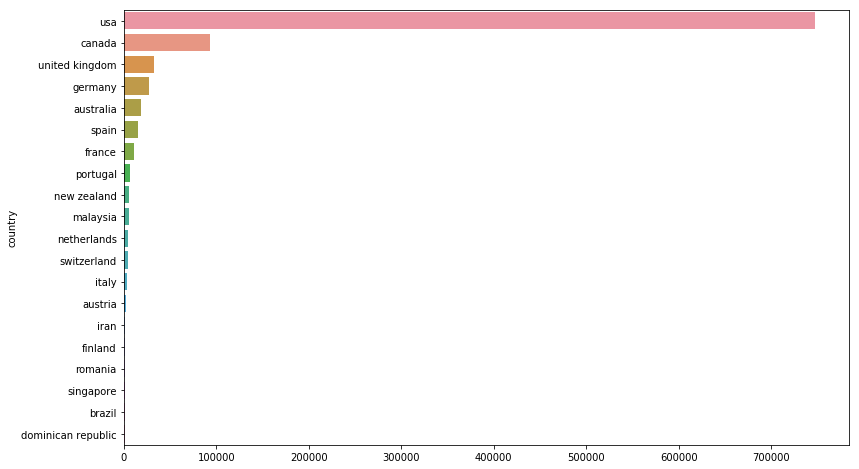

In [18]:
tmp = (
    df_merged.groupby('country')['user'].count().sort_values(ascending=False)
    .head(20)
)
sns.barplot(y=tmp.index, x=tmp.values, orient='h')
plt.show()

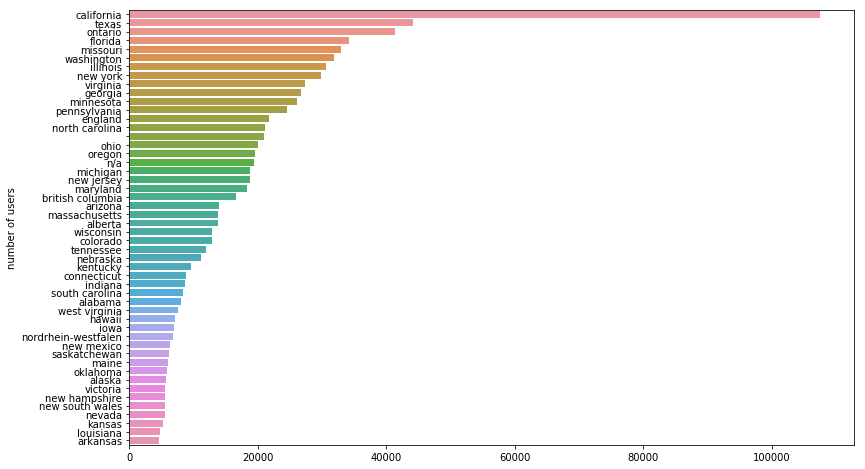

In [16]:
tmp = (
    df_merged.groupby('province')['user'].count().sort_values(ascending=False)
    .head(50)
)
sns.barplot(y=tmp.index, x=tmp.values, orient='h')
plt.ylabel('number of users')
plt.show()

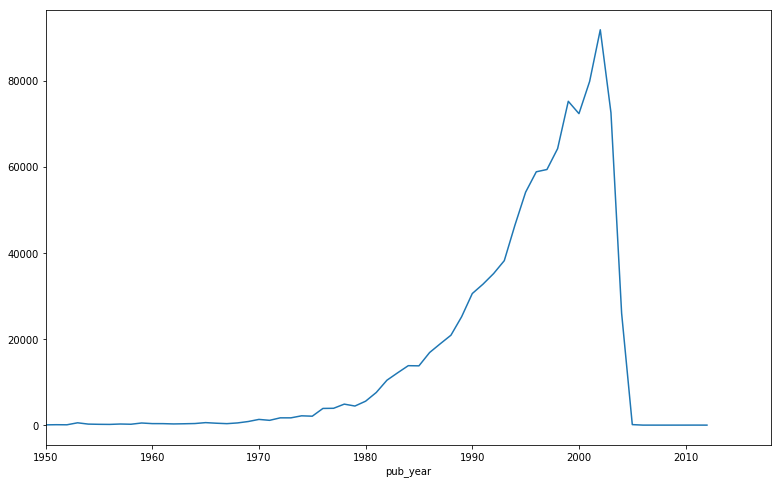

In [29]:
tmp = (
    df_merged.groupby('pub_year')['isbn'].count().sort_index()
)
plt.xlim((1950, 2018))
sns.lineplot(x=tmp.index, y=tmp.values)
plt.show()

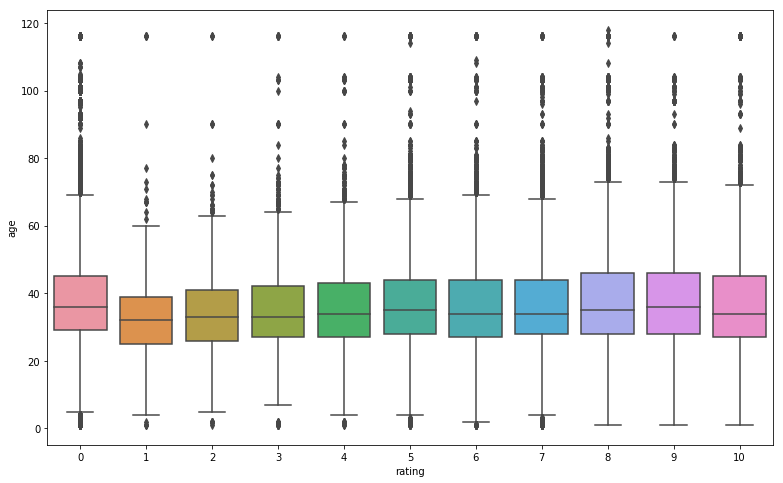

In [76]:
sns.boxplot(y=df_merged.age, x=df_merged.rating)
plt.show()

People in some countries may be more prone to giving higher / more extreme scores than others?

Rating values 0 are dropped


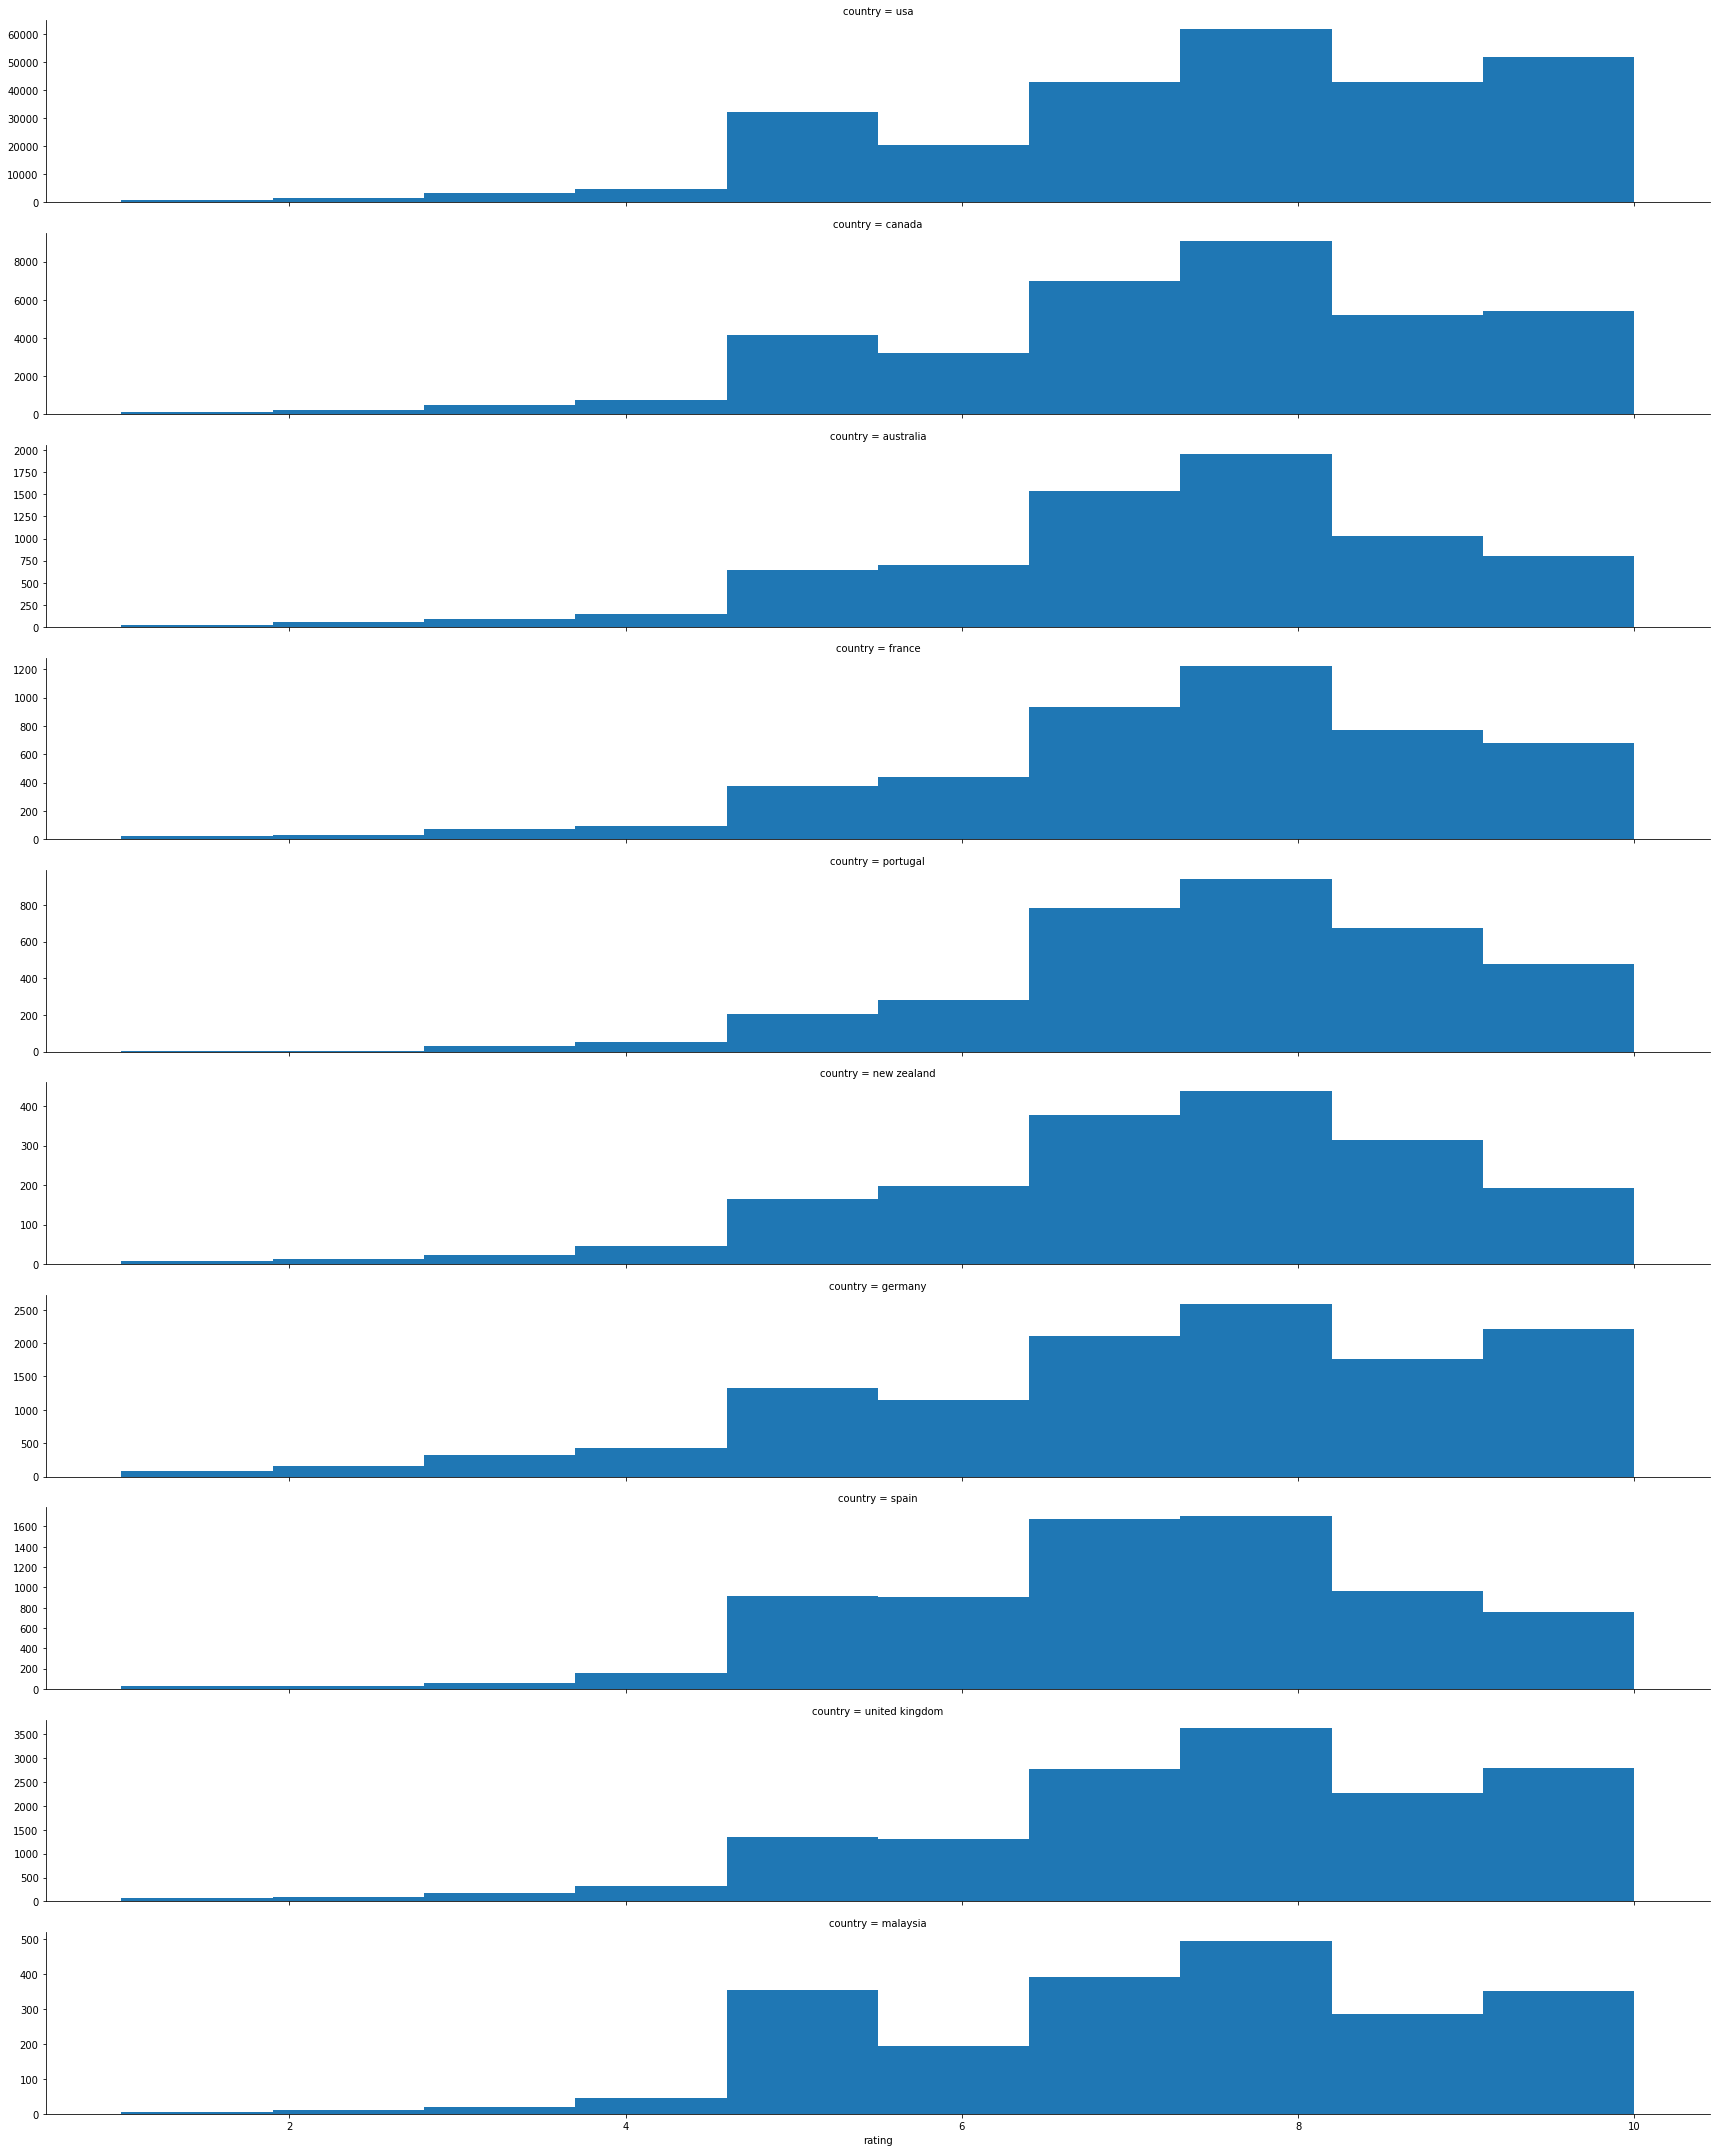

Rating values 0 are dropped


In [70]:
top_countries = list(
    df_merged.groupby('country')['user'].count().sort_values(ascending=False)
    .head(10).index
)
tmp = df_merged[df_merged.country.apply(lambda x: x in top_countries)]
tmp = tmp[tmp.rating > 0]
print('Rating values 0 are dropped')
g = sns.FacetGrid(tmp,  row="country", sharey=False, height=3, aspect=8)
g = g.map(plt.hist, "rating")
plt.show()
print('Rating values 0 are dropped')

Old books seem to get fewer low ratings?

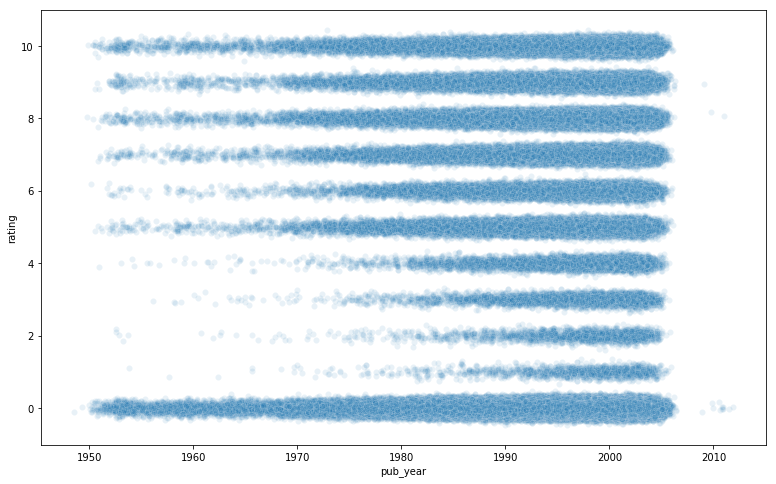

In [74]:
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

tmp = df_merged[['pub_year', 'rating']]
tmp = tmp[tmp.pub_year > 1950]

sns.scatterplot(rand_jitter(tmp.pub_year), rand_jitter(tmp.rating), alpha=0.1)
plt.show()